In [15]:
import cv2
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
img = cv2.imread("input/after/train0b.tif")

In [16]:
pattern = np.ones([3])*247
corner=[]
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        if (img[i,j]==pattern).all() and (img[i+1,j]==pattern).all() and (img[i,j+1]==pattern).all():
            corner.append([i,j])
        

In [17]:
new_corner=[]
for (i,j) in corner:
    if [i-1,j] in corner or [i,j-1] in corner:
        pass
    else:
        new_corner.append([i,j])
        

In [18]:
corner=[]
for (i,j) in new_corner:
    if (img[i,j]==pattern).all() and (img[i+1,j]==pattern).all() and (img[i,j+1]==pattern).all() and (img[i-1,j]==pattern).all() and (img[i,j-1]==pattern).all():
        pass
    else:
        corner.append([i,j])
        
        

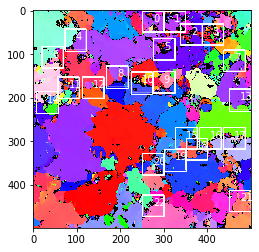

In [19]:
corner = np.load("output/train_corner_0.npy")
fig,ax = plt.subplots(1)
ax.imshow(img)        
for i in range(len(corner)):
    sample_y,sample_x = corner[i]
    h,w=50,50
    rect = patches.Rectangle((sample_x,sample_y),50,50,linewidth=1,edgecolor='w',facecolor='none')
    ax.add_patch(rect)
    plt.text(sample_x+25, sample_y+25,str(i),color="w")
plt.savefig("output/train0b-2.png",dpi=600)
plt.show()

In [20]:
np.load("output/train_corner_0.npy")

array([[  0, 250],
       [  0, 299],
       [ 30, 338],
       [ 30, 387],
       [ 42,  72],
       [ 64, 275],
       [ 82,  19],
       [ 90, 437],
       [127, 168],
       [140, 275],
       [141, 224],
       [152,  56],
       [152, 112],
       [180, 450],
       [185,   6],
       [268, 327],
       [268, 382],
       [268, 437],
       [293, 350],
       [318, 300],
       [328, 250],
       [412, 450],
       [423, 250]])